In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test  = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
#train.head()
#train.info()
#test.info()
#null_percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
#null_percent.head(10)

# Drop 'label' column
train_X = train.drop(labels = ["label"],axis = 1)
train_y = to_categorical(train["label"])

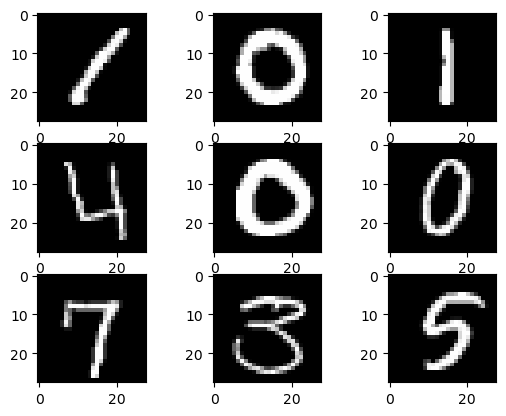

In [3]:
for i in range(9):
    plt.subplot(3,3,i+1)
    img_1d = train.iloc[i,:-1].values
    img = img_1d.reshape(28,28)
    plt.imshow(img,cmap='gray')

deep learning model

In [4]:
# Create the model: model
model = Sequential()

# Add the first hidden layer
model.add(Dense(1000, activation='relu', input_shape=(784,)))

# Add the second hidden layer
model.add(Dense(1000, activation='relu'))

# Add the output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Fit the model
model.fit(x=train_X,y=train_y,validation_split=0.2,epochs=10)

#predict results
predictions = model.predict(test)

Epoch 1/10
1050/1050 [==============================] - 14s 13ms/step - loss: 2.3708 - accuracy: 0.8950 - val_loss: 0.2823 - val_accuracy: 0.9396
Epoch 2/10
1050/1050 [==============================] - 13s 13ms/step - loss: 0.2314 - accuracy: 0.9479 - val_loss: 0.2916 - val_accuracy: 0.9406
Epoch 3/10
1050/1050 [==============================] - 13s 13ms/step - loss: 0.2007 - accuracy: 0.9524 - val_loss: 0.2185 - val_accuracy: 0.9536
Epoch 4/10
1050/1050 [==============================] - 13s 13ms/step - loss: 0.1867 - accuracy: 0.9547 - val_loss: 0.3033 - val_accuracy: 0.9382
Epoch 5/10
1050/1050 [==============================] - 13s 13ms/step - loss: 0.1978 - accuracy: 0.9537 - val_loss: 0.2557 - val_accuracy: 0.9496
Epoch 6/10
1050/1050 [==============================] - 13s 13ms/step - loss: 0.1694 - accuracy: 0.9586 - val_loss: 0.2764 - val_accuracy: 0.9418
Epoch 7/10
1050/1050 [==============================] - 14s 13ms/step - loss: 0.1392 - accuracy: 0.9675 - val_loss: 0.2767 -

In [5]:
predictions = np.argmax(predictions,axis = 1)
predictions = pd.Series(predictions,name="Label")
submission  = pd.concat([pd.Series(range(1,28001),name = "ImageId"),predictions],axis = 1)
submission.to_csv('submission.csv', index=False)